In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv("a1_RestaurantReviews_HistoricDump.tsv",sep="\t")


In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  900 non-null    object
 1   Liked   900 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


In [5]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [7]:
X=pd.DataFrame(df["Review"])
X

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
895,I want to first say our server was great and w...
896,The pizza selections are good.
897,"I had strawberry tea, which was good."
898,Highly unprofessional and rude to a loyal patron!


In [8]:
stemmer=PorterStemmer()
lm=WordNetLemmatizer()

In [9]:
import re
corpus=[]
for i in range(len(X)):
    review=re.sub(r"[^A-Za-z]"," ",X["Review"][i])
    review=review.lower()
    review= review.split(" ")
    review=[lm.lemmatize(word) for word in review if word not  in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)
    

In [10]:
corpus

['wow    loved place ',
 'crust good ',
 'tasty texture nasty ',
 'stopped late may bank holiday rick steve recommendation loved ',
 'selection menu great price ',
 'getting angry want damn pho ',
 'honeslty taste fresh  ',
 'potato like rubber could tell made ahead time kept warmer ',
 'fry great ',
 'great touch ',
 'service prompt ',
 'would go back ',
 'cashier care ever say still ended wayyy overpriced ',
 'tried cape cod ravoli  chicken  cranberry   mmmm ',
 'disgusted pretty sure human hair ',
 'shocked sign indicate cash ',
 'highly recommended ',
 'waitress little slow service ',
 'place worth time  let alone vega ',
 'like ',
 'burrittos blah ',
 'food  amazing ',
 'service also cute ',
 'could care le    interior beautiful ',
 'performed ',
 'right    red velvet cake     ohhh stuff good ',
 '  never brought salad asked ',
 'hole wall great mexican street taco  friendly staff ',
 'took hour get food   table restaurant food luke warm  sever running around like totally overwhel

In [183]:
cv=CountVectorizer(max_features=1600)
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [184]:
X=tf.fit_transform(corpus).toarray()

In [185]:
X.shape

(900, 1640)

In [186]:
y=df["Liked"]

In [187]:
y.shape

(900,)

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [190]:
model1=LogisticRegression()
model1.fit(X_train,y_train)


LogisticRegression()

In [191]:
y_pred=model1.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [193]:
accuracy_score(y_test,y_pred)

0.8111111111111111

In [194]:
finaldf=pd.DataFrame({"actual": y_test, "predicted": y_pred})

In [195]:
finaldf

,actual,predicted
70,1,0
827,0,0
231,0,0
588,1,1
39,0,0
...,...,...
777,0,0
381,1,1
485,1,1
218,0,1


In [196]:
confusion_matrix(y_test,y_pred)

array([[34,  9],
       [ 8, 39]], dtype=int64)

In [197]:
X_train.shape

(810, 1640)

In [198]:
X_test.shape

(90, 1640)

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.81      0.83      0.82        47

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



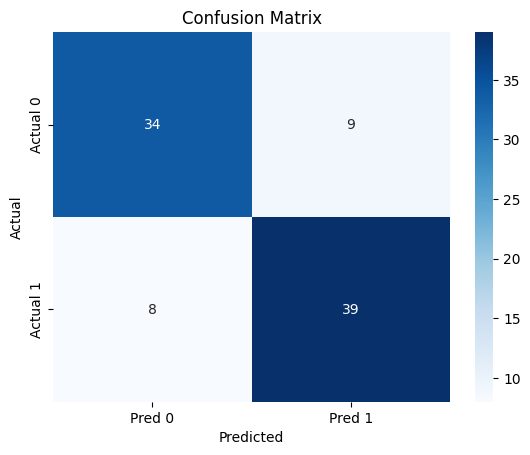

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [201]:
model2=RandomForestClassifier()

In [202]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_c=model2.predict(X_test)

In [203]:
accuracy_score(y_test,y_pred_c)

0.7555555555555555

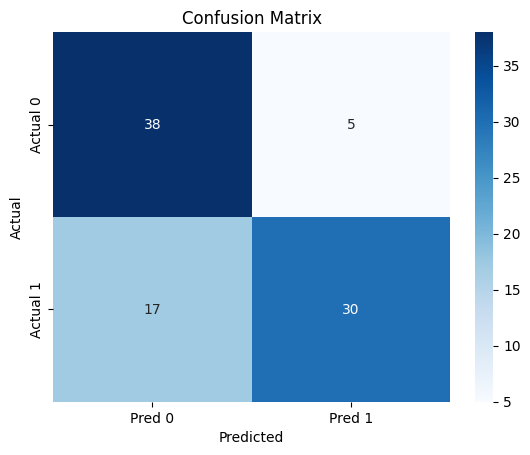

In [204]:
cm = confusion_matrix(y_test, y_pred_c)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [205]:
model3=xgboost.XGBClassifier()

In [206]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_x=model3.predict(X_test)
type(y_pred_x)
print(X_test.shape)
print(y_pred_x.shape)


In [207]:
accuracy_score(y_test,y_pred_x)

0.7222222222222222

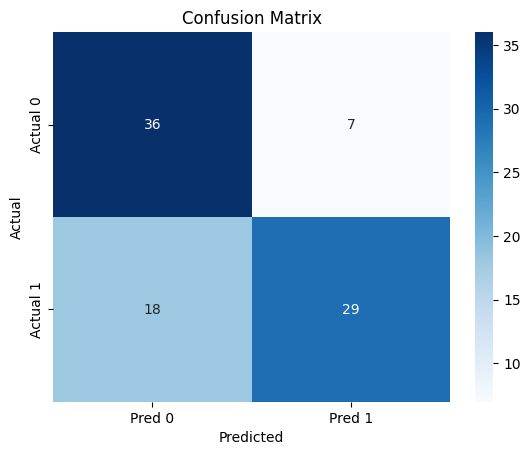

In [208]:
cm = confusion_matrix(y_test, y_pred_x)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [209]:
from sklearn.svm import SVC
model4=SVC()

In [210]:
model4.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_v=model4.predict(X_test)

In [211]:
accuracy_score(y_test,y_pred_v)

0.8

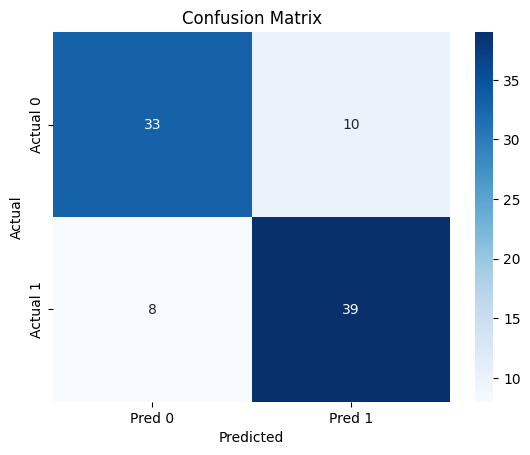

In [212]:
cm = confusion_matrix(y_test, y_pred_v)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [213]:
import pickle
with open("model1.pkl","wb") as file:
    pickle.dump(model1,file)

In [214]:
import pickle
with open("Vectorizer.pkl","wb") as file:
    pickle.dump(tf,file)